In [53]:
import os

import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.ensemble import IsolationForest

sns.set_style("whitegrid")
# sns.color_palette('bright')
sns.set_palette('bright')

In [2]:
data = pd.read_excel('Outlet_Rev_Kar 26.08.21.xlsx', sheet_name='Sheet1')

In [3]:
data.head()

,Outlet Number,Segment,Revenue,Kar,Kar Oran
0,9656148,SILVER,1000.29,316.371830,0.316280
1,9067533,BRONZE,1000.83,241.918171,0.241718
2,9665097,SILVER,1000.94,311.530672,0.311238
3,9665169,SILVER,1001.35,316.342787,0.315916
4,9170641,BRONZE,1001.38,341.121081,0.340651


In [4]:
data['Outlet Number'] = data['Outlet Number'].astype(object)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153661 entries, 0 to 153660
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Outlet Number  153661 non-null  object 
 1   Segment        153661 non-null  object 
 2   Revenue        153661 non-null  float64
 3   Kar            153661 non-null  float64
 4   Kar Oran       153661 non-null  float64
dtypes: float64(3), object(2)
memory usage: 5.9+ MB


In [6]:
data.describe()

,Revenue,Kar,Kar Oran
count,153661.000000,153661.000000,153661.000000
mean,25096.534663,7078.256032,0.281281
std,28885.565549,8157.111236,0.030567
min,1000.290000,4.247213,0.001158
25%,9285.650000,2567.259839,0.263271
50%,17466.680000,4873.684065,0.281924
75%,30977.950000,8749.248682,0.299669
max,498655.080000,167145.891553,0.541565


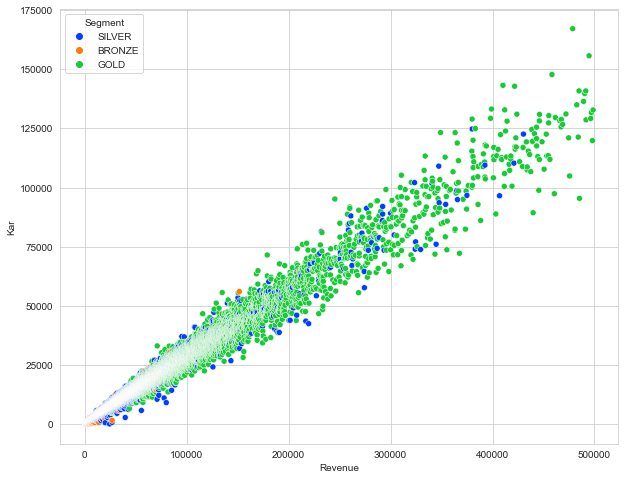

In [8]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=data, hue='Segment', x='Revenue', y='Kar')
plt.show()

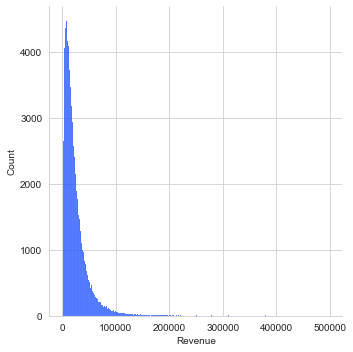

In [14]:
sns.displot(data['Revenue'])

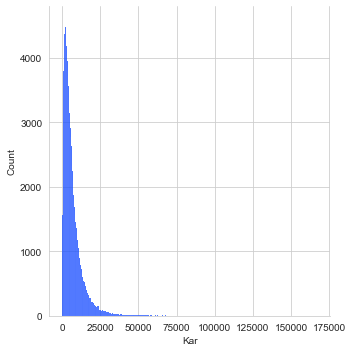

In [15]:
sns.displot(data['Kar'])

---

## Cluster

In [9]:
## set. index Outlet Number

data = data.set_index('Outlet Number')

In [26]:
model_data_1 = data[['Revenue', 'Kar']]

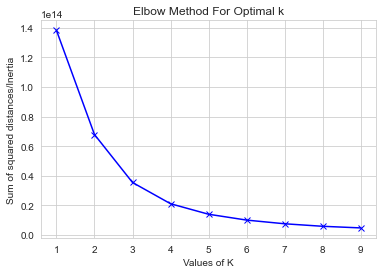

In [27]:
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(model_data_1)
    Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

/Users/tuncayk/genel/miniconda3/envs/env_comm_value_seg/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


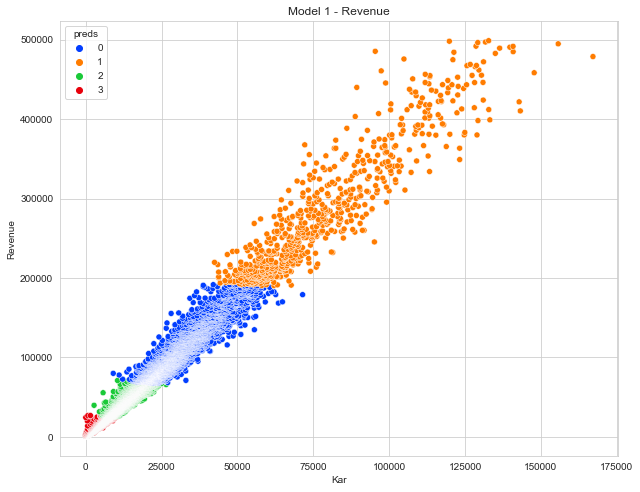

In [28]:
model_1 = KMeans(n_clusters=4, random_state=42, max_iter=100000, init='random')
model_1.fit(model_data_1)
preds = model_1.predict(model_data_1)

# model_data_1 = pd.concat([model_data_1, pd.DataFrame({'preds':preds}, index=model_data_1.index)], axis=1)
model_data_1.loc[:, 'preds'] = preds

result_1 = pd.merge(model_data_1, data['Segment'], how='inner', left_index=True, right_index=True)
result_1['preds'] = result_1['preds'].astype('category')
plt.figure(figsize=(10, 8))
sns.scatterplot(data=result_1.reset_index(), hue='preds', y='Revenue', x='Kar')
plt.title('Model 1 - Revenue')
plt.show()

In [29]:
result_1['preds'].value_counts()

3    105744
2     40132
0      7108
1       677
Name: preds, dtype: int64

In [30]:
data[['Revenue', 'Kar']].corr()

,Revenue,Kar
Revenue,1.000000,0.990798
Kar,0.990798,1.000000


In [31]:
data['log_revenue'] = np.log(data['Revenue'])
data['log_kar'] = np.log(data['Kar'])

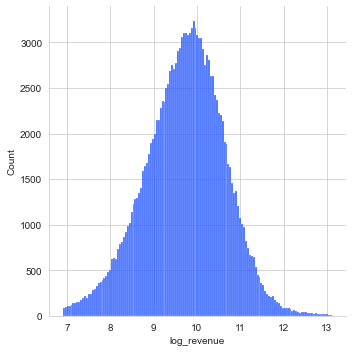

In [32]:
sns.displot(data['log_revenue'])

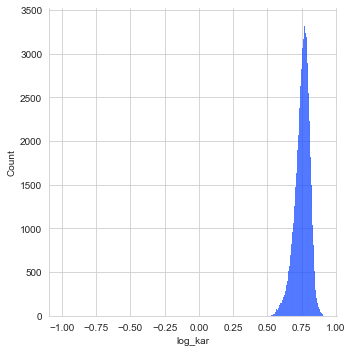

In [52]:
sns.displot(np.log(np.log(data['log_kar'])))

---

## Log Cluster

In [69]:
model_data_2 = data[['log_revenue', 'log_kar']]

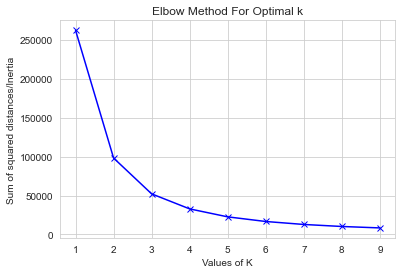

In [35]:
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(model_data_2)
    Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

/Users/tuncayk/genel/miniconda3/envs/env_comm_value_seg/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


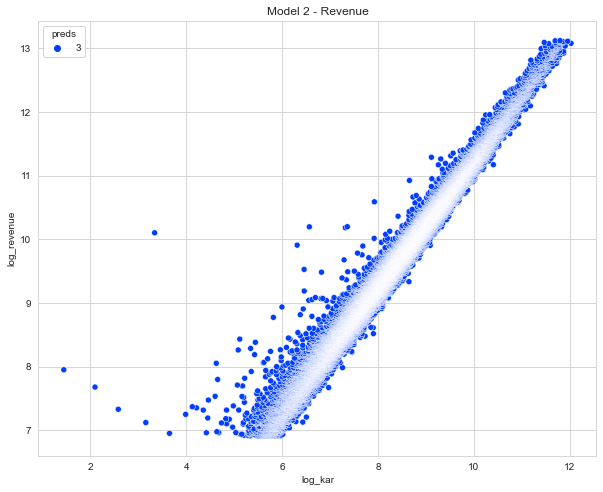

In [70]:
model_2 = KMeans(n_clusters=2, random_state=42, max_iter=100000, init='random')
model_2.fit(model_data_2)
preds = model_1.predict(model_data_2)

# model_data_1 = pd.concat([model_data_1, pd.DataFrame({'preds':preds}, index=model_data_1.index)], axis=1)
model_data_2.loc[:, 'preds'] = preds

result_2 = pd.merge(model_data_2, data['Segment'], how='inner', left_index=True, right_index=True)
result_2['preds'] = result_2['preds'].astype('category')
plt.figure(figsize=(10, 8))
sns.scatterplot(data=result_2.reset_index(), hue='preds', y='log_revenue', x='log_kar')
plt.title('Model 2 - Revenue')
plt.show()

In [72]:
data.head()

,Segment,Revenue,Kar,Kar Oran,log_revenue,log_kar
Outlet Number,,,,,,
9656148,SILVER,1000.29,316.371830,0.316280,6.908045,5.756918
9067533,BRONZE,1000.83,241.918171,0.241718,6.908585,5.488600
9665097,SILVER,1000.94,311.530672,0.311238,6.908695,5.741498
9665169,SILVER,1001.35,316.342787,0.315916,6.909104,5.756826
9170641,BRONZE,1001.38,341.121081,0.340651,6.909134,5.832237


In [74]:
data.reset_index().to_csv('data_20210826.csv', sep='|'
                          , columns=['Outlet Number', 'Segment', 'Revenue', 'Kar']
                         , index=False)